In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data

Text(0, 0.5, 'Feature 2')

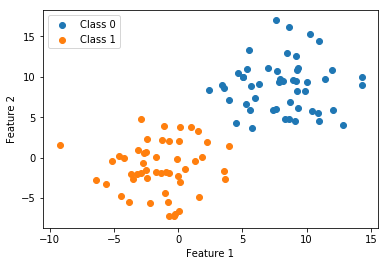

In [2]:
np.random.seed(42)

input_dim = 2
n_samples = 100

mean = -1
std_dev = 3.141

data = np.random.normal(mean, std_dev, (n_samples, input_dim))
data[n_samples // 2:, :] += 3 * std_dev

labels = np.zeros(n_samples)
labels[:n_samples // 2] = 1

for label in np.unique(labels):
    plt.scatter(data[labels==label, 0], data[labels==label, 1], label='Class %d' % label)

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Model
A simple perceptron unit with weights and biases. All values are uint8.

In [3]:
class Perceptron:    
    def __init__(self, input_dim, learning_rate=0.1, dtype=np.uint8):
        self.W = np.zeros(input_dim)
        self.b = 0
        self.lr = learning_rate
        self.dtype = dtype

    def Threshold(self, x):
        return (x > 0).astype(float)
        
    def predict(self, X):
        z = X.dot(self.W.T) + self.b
        
        return self.Threshold(z)
    
    def errors(self, y, y_hat):  
        errors = y - y_hat
        error_rate = np.mean(np.abs(errors))
        
        return errors, error_rate
    
    def step(self, X, y):
        y_hat = self.predict(X)        
        errors, error_rate = self.errors(y, y_hat)

        dW = (errors.reshape(-1, 1) * data).mean(axis=0)
        db = errors.mean()
        
        self.W += self.lr * dW
        self.b += self.lr * db
        
        return error_rate

In [4]:
p = Perceptron(input_dim, learning_rate=0.01, dtype=np.float32)
error_rate_history = []

for epoch in range(20):
    error_rate = p.step(data, labels)
    error_rate_history.append(error_rate)
    print('Epoch {} - error_rate: {}'.format(epoch, error_rate))    

Epoch 0 - error_rate: 0.5
Epoch 1 - error_rate: 0.13
Epoch 2 - error_rate: 0.1
Epoch 3 - error_rate: 0.08
Epoch 4 - error_rate: 0.01
Epoch 5 - error_rate: 0.01
Epoch 6 - error_rate: 0.0
Epoch 7 - error_rate: 0.0
Epoch 8 - error_rate: 0.0
Epoch 9 - error_rate: 0.0
Epoch 10 - error_rate: 0.0
Epoch 11 - error_rate: 0.0
Epoch 12 - error_rate: 0.0
Epoch 13 - error_rate: 0.0
Epoch 14 - error_rate: 0.0
Epoch 15 - error_rate: 0.0
Epoch 16 - error_rate: 0.0
Epoch 17 - error_rate: 0.0
Epoch 18 - error_rate: 0.0
Epoch 19 - error_rate: 0.0


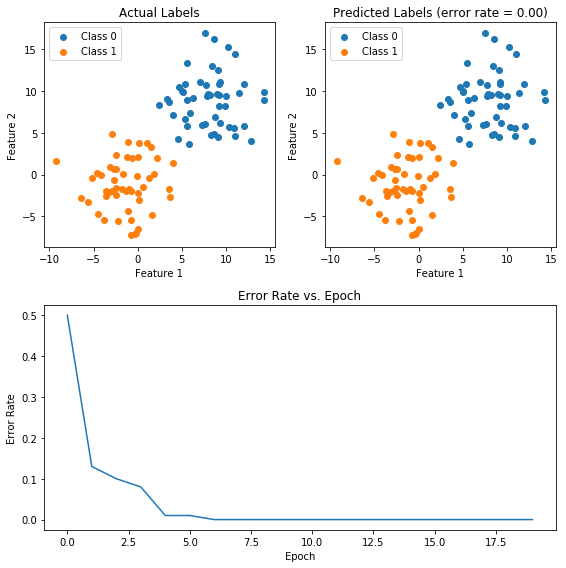

In [5]:
pred = p.predict(data)
pred = pred
_, error_rate = p.errors(labels, pred)

plt.figure(figsize=(8, 8))

plt.subplot(221)
for label in np.unique(labels):
    plt.scatter(data[labels==label, 0], data[labels==label, 1], label='Class %d' % label)

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Actual Labels')

plt.subplot(222)
for label in np.unique(labels): 
    plt.scatter(data[pred==label, 0], data[pred==label, 1], label='Class %d' % label)
        
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Labels (error rate = %.2f)' % error_rate)

plt.subplot(212)
plt.plot(error_rate_history)
plt.ylabel('Error Rate')
plt.xlabel('Epoch')
plt.title('Error Rate vs. Epoch')

plt.tight_layout()
plt.show()